Write a discrete event simulation program for a blocking system, i.e. a system with m service units and no waiting room. The offered traffic A is the product of the mean arrival rate and the mean service time.
1. The arrival process is modelled as a Poisson process. Report the fraction of blocked customers, and a confidence interval for this fraction. Choose the service time distribution as exponential. Parameters: m = 10, mean service time = 8 time units, mean time between customers = 1 time unit (corresponding to an offered traffic of 8 Erlang), 10 x 10.000 customers.

In [1]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import scipy.stats as st

In [389]:
customers = 10000
sim = 10


m = 10

#mean service time
s = 8

#mean time between customers, arrival rate 1 customer per time unit
mean_tbc = 1
arrival_intensity = 1

#confidence interval
def conf_int (mean, std, n):
       Z = st.t.ppf(0.95, sim)
       return (mean - Z * (std/math.sqrt(n)), mean + Z * (std/math.sqrt(n)))


A = arrival_intensity * s
def Erlang_B (A, m):
    d = 0
 
    for i in range(m+1):
        d = d + A**i / math.factorial(i)

    return ( (A**m) / math.factorial(m) ) / d


def blocking_system (inter_arrival_dist, service_times_dist, m, s, customers, sim):
  fract_blocked_counts = []
  blocked_customer_count = 0

  #set service time for all units to zero
  service_unit_time = np.zeros(m)

  for _ in range(sim):
    blocked_customer_count = 0
    #go through all customers
    for i in range(customers):
      #generate random arrival time for coming customer
      if (inter_arrival_dist == "hyper-exponential"):
        e = np.random.exponential((1/0.8333), 1)*0.8 + np.random.exponential(1/5, 1)*0.2
        arrival_time =  e[0]
      elif (inter_arrival_dist == "erlang") :
        arrival_time = st.erlang.rvs(1, size=1, scale=mean_tbc)[0]
      else:
         arrival_time = np.random.exponential(1, 1)[0]

      #arrival_time = inter_arrival_dist[i]

      #subtract the arrival time from the service units times
      service_unit_time -= arrival_time

      #sort the service units with increasing time
      service_unit_time = np.sort(np.maximum(service_unit_time, 0.0))

      #check if there are service units 
      if (len([i for i in service_unit_time if i < 0.1]) == 0):
        blocked_customer_count += 1
      else:
        if (service_times_dist == "exponential"):
          service_unit_time[0] = np.random.exponential(8, 1)[0]
        elif (service_times_dist == "constant"):
          service_unit_time[0] = s
        elif (service_times_dist == "pareto_1.05"):
          x_m = s * (1.05 - 1) / 1.05
          service_unit_time[0] = (( np.random.pareto(1.05, size=1) + 1) * x_m ) [0]
        elif (service_times_dist == "pareto_2.05"):
          x_m = s * (2.05 - 1) / 2.05
          service_unit_time[0] = (( np.random.pareto(2.05, size=1) + 1) * x_m ) [0]
        elif (service_times_dist == "chi-squared"):
          service_unit_time[0] = np.random.chisquare(s, 1)[0]
        else:
           service_unit_time[0] = np.random.exponential(8, 1)[0]

        #service_unit_time[0] = service_times_dist[i]
                
    fract_blocked_counts.append(blocked_customer_count/customers)

  print(f"Inter-arrival-time distribution: {inter_arrival_dist} \nService-time distribution: {service_times_dist}")
  print("fraction blocked: " + str(np.mean(fract_blocked_counts)))
  print("fraction Erlang blocked: " + str(Erlang_B (s, m)))
  print("Confidence interval = " + str(conf_int (np.mean(fract_blocked_counts), np.std(fract_blocked_counts), sim)))

  a, b = conf_int (np.mean(fract_blocked_counts), np.std(fract_blocked_counts), sim)
  print("Width of ci = " + str(b-a))
  print("Variance = " + str(np.var(fract_blocked_counts)))


m = 10

p_dist = np.random.exponential(arrival_intensity, customers)
# mean service time is 8, so lambda is equal to 8
exp_dist = np.random.exponential(8, customers)


blocking_system ("exponential", "exponential", m, s, customers, 10)



Inter-arrival-time distribution: exponential 
Service-time distribution: exponential
fraction blocked: 0.12044000000000002
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.11737397142133502, 0.12350602857866502)
Width of ci = 0.0061320571573300064
Variance = 2.861639999999999e-05


2. The arrival process is modelled as a renewal process using the same parameters as in Part 1 when possible. Report the fraction of blocked customers, and a confidence interval for this fraction for at least the following two cases

(a) Experiment with Erlang distributed inter arrival times The Erlang distribution should have a mean of 1

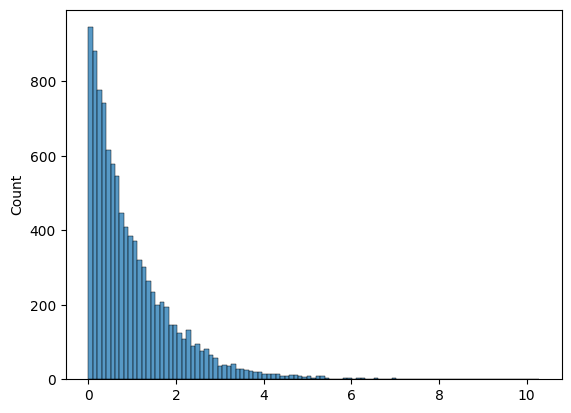

Inter-arrival-time distribution: erlang 
Service-time distribution: exponential
fraction blocked: 0.11877
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.11542061794150624, 0.12211938205849376)
Width of ci = 0.006698764116987527
Variance = 3.415009999999998e-05


In [390]:
l = 1
u = np.random.uniform(low=1, high=10, size=customers)
t = 0
s = 8.0

# erlang should have a mean of 1, so lambda is 1
erl = st.erlang.rvs(1, size=customers, scale=mean_tbc)
exp_dist = np.random.exponential(8, customers)
sns.histplot(erl, kde=False)
plt.show()


#blocking_system (erl, exp_dist, m, s, customers, 10)
blocking_system ("erlang", "exponential", m, s, customers, 10)




(b) hyper exponential inter arrival times. The parameters for the hyper exponential distribution should be
p1 = 0.8,λ1 = 0.8333,p2 = 0.2,λ2 = 5.0.

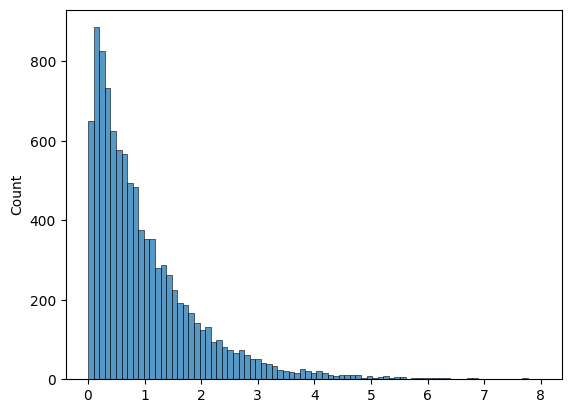

Inter-arrival-time distribution: hyper-exponential 
Service-time distribution: exponential
fraction blocked: 0.11282
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.10813249756446182, 0.11750750243553819)
Width of ci = 0.00937500487107637
Variance = 6.68876e-05


In [391]:

hypexp = []
exp_dist = np.random.exponential(8, customers)
u = np.random.uniform(0,1, customers)
m = 10


#HYPER EXPONENTIAL DISTRIBUTION
sample = np.random.exponential(1/0.8333, customers)*0.8 + np.random.exponential(1/5, customers)*0.2


#show plots
sns.histplot(sample, kde=False)
plt.show()

#blocking_system (sample, exp_dist, m, s, customers, 10)
blocking_system ("hyper-exponential", "exponential", m, s, customers, 10)



3. The arrival process is again a Poisson process like in Part 1. Experiment with different service time distributions with the same mean service time and m as in Part 1 and Part 2.

(a) Constant service time

In [392]:
m = 10
s = 8.0

p_dist = np.random.exponential(1, customers)
t_dist = [s for _ in range(customers)]

#blocking_system (p_dist, t_dist, m, s, customers, 10)
blocking_system ("exponential", "constant", m, s, customers, 10)

Inter-arrival-time distribution: exponential 
Service-time distribution: constant
fraction blocked: 0.11739000000000002
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.11541110285389926, 0.11936889714610079)
Width of ci = 0.0039577942922015275
Variance = 1.1920900000000001e-05


(b) Pareto distributed service times with at least k = 1.05 and
k = 2.05.

In [393]:
# mst2 = ( (np.random.pareto(1.05, size=customers) + 1) * ( (((2.05-1)* 8)/2.05) ) )
#mst2 = np.array([st.pareto.pdf(x, scale=( ((1.05-1)/1.05) * 8), b=1.05)])



m = 10
s = 8.0
p_dist = np.random.exponential(1, size=customers)

#Check means of distributions for k = 1.05 and k = 2.05
for k0 in [1.05, 2.05]:
    x_m1 = s * (k0 - 1) / k0
    mst2 = ( np.random.pareto(k0, size=1) + 1) * x_m1
    
    if k0 == 1.05:
        print("k = 1.05, mean : " + str(np.mean(mst2) ))
    else:
        print("k = 2.05, mean : " + str(np.mean(mst2) ))


customers = 10000




#take the mean of the fractions of blocked costumers from the simulations
#avg_fract_blocked = np.sum(fract_blocked_counts) / sim

print("For k = 1.05: ")
k = 1.05
x_m = s * (k - 1) / k
d1 = (( np.random.pareto(1.05, size=customers) + 1) * x_m )
#blocking_system (p_dist, d1, m, s, customers, 10)
blocking_system ("exponential", "pareto_1.05", m, s, customers, 10)
print("For k = 2.05: ")
k = 2.05
x_m = s * (k - 1) / k
d2 = (( np.random.pareto(2.05, size=customers) + 1) * x_m )

#blocking_system (p_dist, d2 , m, s, customers, 10)
blocking_system ("exponential", "pareto_2.05", m, s, customers, 10)



k = 1.05, mean : 0.7258025451472706
k = 2.05, mean : 5.02262814908996
For k = 1.05: 
Inter-arrival-time distribution: exponential 
Service-time distribution: pareto_1.05
fraction blocked: 0.0028899999999999998
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.00013202608292900474, 0.005647973917070994)
Width of ci = 0.00551594783414199
Variance = 2.3154899999999994e-05
For k = 2.05: 
Inter-arrival-time distribution: exponential 
Service-time distribution: pareto_2.05
fraction blocked: 0.11990999999999999
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.11498687713997668, 0.1248331228600233)
Width of ci = 0.00984624572004661
Variance = 7.378090000000001e-05


(c) Choose one or two other distributions.

The Pareto distribution with a value of k = 1.05 presents an extremely small number of the fraction of blocked customers. This can be justified by the fact that for values of k that are smaller or equal to 2, the variance is infinite. Thus, the spread of the samples generated is extremely large, which in this case means that the random generated service times are spread enough to allow most service units to become free after the arrival of the next customer. 

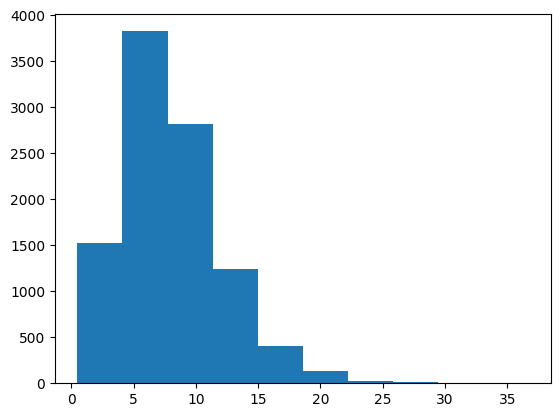

Inter-arrival-time distribution: exponential 
Service-time distribution: chi-squared
fraction blocked: 0.11551
fraction Erlang blocked: 0.12166106425295149
Confidence interval = (0.11399565646370258, 0.11702434353629743)
Width of ci = 0.003028687072594849


In [388]:
#Chi-squared distribution
m = 10
s = 8.0

mst4 = np.random.exponential(s, customers)
g = np.random.chisquare(s, customers)
plt.hist(g)
plt.show()

# blocking_system (p_dist, g, m, s, customers, 10)
blocking_system ("exponential", "chi-squared", m, s, customers, 10)


The constant distribution for service time presents a 95% confidence interval with the smalest width. The chisquared distribution for the service time presents a similar confidence interval width as the constant distribution. This means that the 

In general the constant, followed by the erlang, hyperexponential and pareto distributions, present descending level of precision (higher variance).

From this exercise we learned that in a blocking system, as long as the arrival process is a Poisson process (interarrival times follow an exponential distribution) then Erlang's B-formula for computing the fraction of blocked customers, given the number of service units, is always valid for any service time distribution. 